In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from imblearn.over_sampling import ADASYN
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score
%matplotlib inline
plt.style.use('ggplot')
pd.set_option('display.max_columns', 200) # So we can see all columns
pd.set_option('display.max_rows',200)
import utility_functions

In [2]:
df = pd.read_csv("D:/Banque Misr Internship/Loan Datasets/final_dataset.csv")

In [3]:
import importlib
importlib.reload(utility_functions)

<module 'utility_functions' from 'd:\\Banque Misr Internship\\loan-defaulter-prediction\\Final Notebooks\\utility_functions.py'>

In [4]:
# # Split the data into features (X) and target (y)
# x = df.drop('TARGET', axis=1)
# y = df['TARGET']

In [5]:
# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [6]:
# adasyn = ADASYN(sampling_strategy='minority', random_state=42)
# X_train_resampled, y_train_resampled = adasyn.fit_resample(X_train, y_train)

In [7]:
# X_train_res, X_val, y_train_res, y_val = train_test_split(X_train_resampled, y_train_resampled, test_size=0.3, random_state=42)

In [8]:
X_train_res,X_val,y_train_res,y_val,X_test,y_test = utility_functions.setup_model(df)

In [13]:
# Decision Tree Model
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train_res, y_train_res)



[8.19387192e-03 9.75046329e-03 2.48384399e-03 1.06413729e-02
 1.11463214e-02 1.30481090e-02 7.38878799e-03 1.17398751e-02
 1.38181652e-02 1.18158783e-02 4.34324831e-02 1.16482499e-01
 6.31408339e-02 7.47295272e-03 1.00107484e-02 5.34442651e-03
 1.21693073e-02 1.32004537e-03 2.93227836e-04 1.07153215e-02
 1.46781983e-01 5.89071696e-02 2.62250627e-02 6.92682682e-02
 1.92941463e-02 2.12996690e-02 8.00605731e-04 2.97608818e-03
 9.28063934e-05 2.09787953e-04 6.51283996e-04 1.52064011e-03
 5.91418949e-03 0.00000000e+00 1.82968086e-02 0.00000000e+00
 3.97022342e-04 4.55008109e-03 0.00000000e+00 0.00000000e+00
 9.17636633e-03 1.02313884e-04 6.79010862e-02 1.04205382e-02
 2.69480654e-03 7.09739981e-02 5.06357890e-03 8.82680801e-03
 3.90306195e-03 4.95628189e-03 0.00000000e+00 3.64531576e-03
 1.99404143e-04 1.73518260e-03 1.14475288e-03 3.77695863e-04
 1.07510832e-03 1.32198238e-03 9.30238436e-04 9.90963308e-04
 8.04236300e-04 1.99815278e-03 2.63184274e-03 1.84783451e-04
 1.25942950e-03 1.657004

In [15]:
feature_names = X_train_res.columns
importances = tree_model.feature_importances_
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort features by importance
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Print the top 10 most important features
print(feature_importances.head(10))

                                              Feature  Importance
20                                      CODE_GENDER_F    0.146782
11                                       EXT_SOURCE_3    0.116482
45  NAME_EDUCATION_TYPE_Secondary / secondary special    0.070974
23                                     FLAG_OWN_CAR_Y    0.069268
42               NAME_EDUCATION_TYPE_Higher education    0.067901
12                           OBS_30_CNT_SOCIAL_CIRCLE    0.063141
21                                      CODE_GENDER_M    0.058907
10                                       EXT_SOURCE_2    0.043432
22                                     FLAG_OWN_CAR_N    0.026225
25                                  FLAG_OWN_REALTY_Y    0.021300


In [10]:
y_pred_tree = tree_model.predict(X_val)


In [11]:
utility_functions.calculate_metrics(y_val,y_pred_tree)

Accuracy: 0.9105
F1 Score: 0.9113
ROC-AUC Score: 0.9105


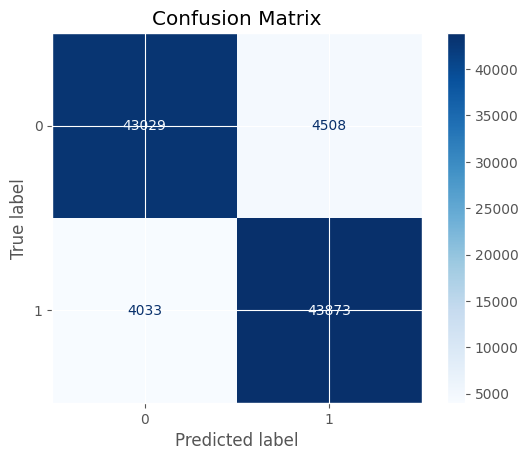

In [12]:
# Calculate the confusion matrix
cm = confusion_matrix(y_val, y_pred_tree)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=tree_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()